<a href="https://colab.research.google.com/github/katelyndiaz/KWK_DS2021/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A Complete Linear Regression Machine Learning Project

### **1. Import Packages**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### **2. Load in Data**

#### Revisiting Spotify Data

This data is originally from: https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

Let's use this data to answer the question. If you are a musician and need help deciding how to create the next chart topping hit, what musical features should you highlight to improve the chances your song will be a popular hit?

In [ ]:
# load in data 
song_data = pd.read_csv('spotify.csv')


In [ ]:
# preview data 
song_data.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


### **3. Data Cleaning & EDA** 

In [ ]:
#look at shape 
song_data.shape

(28680, 16)

In [ ]:
# dropping the genre column because we don't need it and it is partially empty 
song_data=song_data.drop(['genres'], axis=1)

"Axis = 1" specifies the axis along which the means are computed. Axis=0 along the rows, and axis=1 along the columns. 

In [ ]:
# Be sure to remove duplicates in any data
song_data.drop_duplicates(inplace = True)

# Count the values in the dataset
song_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28680 entries, 0 to 28679
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           28680 non-null  object 
 1   acousticness      28680 non-null  float64
 2   danceability      28680 non-null  float64
 3   duration_ms       28680 non-null  float64
 4   energy            28680 non-null  float64
 5   instrumentalness  28680 non-null  float64
 6   liveness          28680 non-null  float64
 7   loudness          28680 non-null  float64
 8   speechiness       28680 non-null  float64
 9   tempo             28680 non-null  float64
 10  valence           28680 non-null  float64
 11  popularity        28680 non-null  float64
 12  key               28680 non-null  int64  
 13  mode              28680 non-null  int64  
 14  count             28680 non-null  int64  
dtypes: float64(11), int64(3), object(1)
memory usage: 3.5+ MB


[read more about "inplace = True"](https://www.ritchieng.com/pandas-inplace-parameter/)

In [ ]:
# Print high level summaries of what is in the dataset
song_data.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,28680.000000,28680.000000,2.868000e+04,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000
mean,0.498373,0.546490,2.388780e+05,0.497488,0.174756,0.202441,-11.140498,0.094014,115.844830,0.512723,34.060945,5.412901,0.759170,13.847211
std,0.370614,0.176474,1.211318e+05,0.254885,0.298406,0.140884,5.771749,0.111986,25.003834,0.244421,22.376438,3.480552,0.427595,53.372544
min,0.000000,0.000000,1.879550e+04,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.122296,0.431000,1.823304e+05,0.283568,0.000004,0.110363,-13.972292,0.039200,99.366500,0.329000,12.000000,2.000000,1.000000,2.000000
50%,0.478458,0.557000,2.186400e+05,0.504000,0.001880,0.161000,-10.088938,0.052200,115.357400,0.523243,39.000000,6.000000,1.000000,3.000000
75%,0.896000,0.675000,2.684670e+05,0.702783,0.215291,0.247000,-6.889000,0.095300,129.848750,0.703000,51.000000,8.000000,1.000000,8.000000
max,0.996000,0.986000,5.403500e+06,1.000000,1.000000,0.991000,1.342000,0.964000,217.743000,0.991000,93.000000,11.000000,1.000000,3169.000000


#### What do all these features mean? 

Check Spotify's documentation to see what each column value mean: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

#### Feature Selection

**Correlation Matrix**

Typically, a correlation matrix is “square”, with the same variables shown in the rows and columns. I've shown an example below. This shows correlations between the stated importance of various things to people. The line of 1.00s going from the top left to the bottom right is the main diagonal, which shows that each variable always perfectly correlates with itself. This matrix is symmetrical, with the same correlation is shown above the main diagonal being a mirror image of those below the main diagonal.



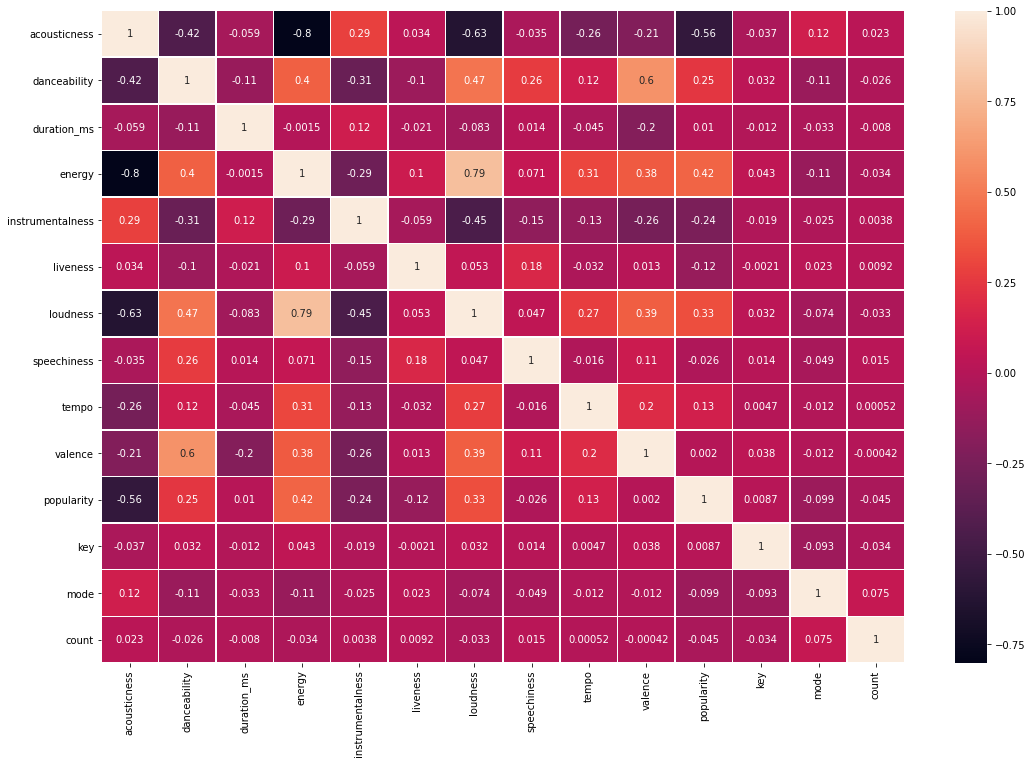

In [ ]:
# create a correlation matrix 

# set the figure size 
plt.subplots(figsize=(18, 12))

# create var for matrix 
corr = song_data.corr()

# plot the cor matrix 
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=.5,annot=True)

#change the color palette
sns.color_palette("coolwarm", as_cmap=True)

***INTERPRETATION: One way to quantify this relationship is to use the Pearson correlation coefficient, which is a measure of the linear association between two variables. It has a value between -1 and 1 where:***

* ***-1 indicates a perfectly negative linear correlation between two variables***
* ***0 indicates no linear correlation between two variables***
* ***1 indicates a perfectly positive linear correlation between two variables*** 

***The further away the correlation coefficient is from zero, the stronger the relationship between the two variables.***

Each cell in the table shows the correlation between two specific variables. For example, the highlighted cell below shows that the correlation between “energy” and “loudness” is 0.79, which indicates that they’re **strongly positively correlated**. More energy is strongly related to loudness.

#### Avoid Features that are highly correlated with each other

This is called 'Multicolinearity' and can confuse the model. If two separate features are highly correlated, the model will have a hard time distinguishing which has the greater predictive influence. In the above case, 'Loudness' and 'Energy' are highly correlated, and we should retain only one of them as a feature. You can read more about multicollinearity here: https://en.wikipedia.org/wiki/Multicollinearity#:~:text=Multicollinearity%20refers%20to%20a%20situation,equal%20to%201%20or%20%E2%88%921. 

### **4. Exploratory Plots**

We have over 100,000 data points. It would be hard to discern patterns in plotting that many points, so in this case we can randomly sample a smaller set to plot and explore the data.

In [ ]:
# create a smaller data set
songs_lite = song_data.sample(n=500)

[learn more about the sample function](https://www.geeksforgeeks.org/python-random-sample-function/#:~:text=sample()%20is%20an%20inbuilt,for%20random%20sampling%20without%20replacement.)

In [ ]:
# check the columns 
songs_lite.columns

Index(['artists', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key', 'mode', 'count'],
      dtype='object')

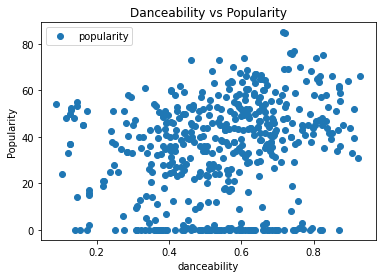

In [ ]:
# scatter plot for danceability and popularity
songs_lite.plot(x='danceability', y='popularity', style='o')
plt.xlabel('danceability')
plt.ylabel('Popularity')
plt.show()

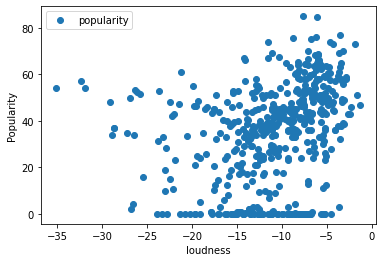

In [ ]:
# scatter plot for loudness and popularity
songs_lite.plot(x='loudness', y='popularity', style='o')
plt.xlabel('loudness')
plt.ylabel('Popularity')
plt.show()

### **5. Split Data into Test and Train Datasets**

We will split the data into one set for training, and one set that we hold to the end to score the model's performance on data it has never seen (test set).

**Preparing the Data** <br>
The next step is to divide the data into "attributes" and "labels". Attributes are the independent variables while labels are dependent variables whose values are to be predicted. We want to predict the popularity depending on the other variables. To extract the attributes and labels, execute the following script:

In [ ]:
# looking at all our columns
song_data.columns

Index(['artists', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key', 'mode', 'count'],
      dtype='object')

In [ ]:
# drop columns we don't want + the 
X_songs = song_data.drop(columns=["popularity","artists", "loudness"])
y_songs = song_data[['popularity']]

The attributes are stored in the X variable. We specified drop "popularity"  from the columns since we wanted our attribute set to contain all the columns except the last one, which is "popularity". We also don't want to include "loudness" because it could cause multicollinearity. Finally, we dropped "artists" because we do not want any categorical variables. Similarly the y variable contains the labels. We specified "popularity" for the label. 


Test vs Training Set 
*   training set—a subset to train a model.
*   test set—a subset to test the trained model.




In [ ]:
# hold out 20% of the data for final testing
X_train, X_test, y_train, y_test = train_test_split(X_songs, y_songs, test_size=.20) # test_size variable sets the % of your split

The above script splits 80% of the data to training set while 20% of the data to test set. The test_size variable is where we actually specify the proportion of test set.

In [ ]:
# tell us how many data points are in each set  
print("Songs in Train set:", len(X_train))
print("Songs in Test set:", len(X_test))

Songs in Train set: 22944
Songs in Test set: 5736


### **6. Train the Model**

With Scikit-Learn it is extremely straight forward to implement linear regression models, as all you really need to do is import the LinearRegression class, instantiate it, and call the fit() method along with our training data. This is about as simple as it gets when using a machine learning library to train on your data.

In the theory section we said that linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset, execute the following code.



In [ ]:
# instanciate the model
song_linear_regression = LinearRegression()

# fit the model 
song_linear_regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# score the model on train set
song_linear_regression.score(X_train,y_train)

0.3591892593341841

The most common interpretation of r-squared is how well the regression model fits the observed data. In our example, the r-squared of 35% reveals that 35% of the data fit the regression model. Generally, a higher r-squared indicates a better fit for the model but 35% is not terrible.  


### **7. Score the Model on the Test Set**


In [ ]:
# score on test set
song_linear_regression.score( X_test,y_test)

0.3439301605794163

Our final test R-squared score remains at 38% which means our model predicted equally well on test data it was not trained on. This is a good indicator that it will also perform well on future data that we dont know the popularity of.

### **8. Predict Using the Model**

Let's say you're a musician with a new track and you're in the studio deciding how the song should come together. You could analyse the track along the features to predict how popular it may be on Spotify. 

Your track's features could be expressed as:

In [ ]:
acousticness = 0.25
danceability = 0.75
duration_ms = 240000
energy = .75
explicit = 1
instrumentalness = 0.05
key = 5
liveness = .2
mode = 1
speechiness = .1
tempo = 110
valence = .5

Predict the popularity of a song using the model we trained:

In [ ]:
# predict popularity
song_linear_regression.predict([[acousticness, danceability, duration_ms, energy, explicit, instrumentalness, key, liveness, mode, speechiness, tempo, valence]])

array([[-188.71265884]])

***INTERPRETATION: The output of the cell above is the popularity of our song using the model we trained. Based on the specific features above, our song would have a popularity score of -188 (that doesn't seem very popular). If i was the artist, I would not create a song with those track features!***  

How does the model predict the popularity? We can take a look at the coefficients for each feature

In [ ]:
#look at coef
song_features = zip(list(X_train.columns), song_linear_regression.coef_[0])

for song_feature in song_features: 
    print(song_feature)

('acousticness', -29.346766513404962)
('danceability', 14.66283075413425)
('duration_ms', -7.259300865314344e-06)
('energy', 3.2295206428771923)
('instrumentalness', -8.71409885137243)
('liveness', -14.80921299412499)
('speechiness', -12.05000085074734)
('tempo', -0.0007756853838993393)
('valence', -19.208649562871745)
('key', -0.058260512513263606)
('mode', -1.4747331054124357)
('count', -0.01075259389236953)


The danceability coefficient in the regression equation is 14.6. This coefficient represents the mean increase of popularity for every additional one meter in danceability. If your danceability increases by 1, the average popularity increases by 14.6. 

The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable and the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.


The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant. This property of holding the other variables constant is crucial because it allows you to assess the effect of each variable in isolation from the others.

Play around with the features to see how it impacts the popularity prediction. If you are a musician in a studio, what features would you highlight or minimize to create a chart-topping hit? 

### **Next Steps**

The use of validation data sets when selecting between different potential models. 